In [1]:
# Imports
import numpy as np
import pandas as pd
import sys
import os
from sklearn.preprocessing import LabelEncoder
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour les visualisations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# Définir le chemin du projet
notebook_dir = Path().absolute()
project_dir = notebook_dir.parent if notebook_dir.name == 'notebooks' else notebook_dir
data_dir = os.path.join(project_dir, 'data', 'source')

# Ajouter le répertoire parent (racine du projet) au path
sys.path.append(os.path.abspath('..'))

In [2]:
# Configuration MLflow
import mlflow
import mlflow.sklearn
from datetime import datetime

# Fermer tout run actif (si un ancien run est encore ouvert)
while mlflow.active_run():
    run_info = mlflow.active_run().info
    print(f"Fermeture du run précédent: {run_info.run_name} (id: {run_info.run_id})")
    mlflow.end_run()

# Définir l'URI de tracking MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Nom de l'expérience
experiment_name = "1-credit-scoring-exploration"
mlflow.set_experiment(experiment_name)

# Démarrer un run MLflow manuellement
mlflow_run = mlflow.start_run(run_name="data_exploration_analysis")

# Vérification
print(f"MLflow - Expérience: {experiment_name}")
print(f"Run démarré: {mlflow_run.info.run_name} (id: {mlflow_run.info.run_id})")

MLflow - Expérience: 1-credit-scoring-exploration
Run démarré: data_exploration_analysis (id: 01a3e596b44840c580904bb8d33e61ec)


# application_{train|test}.csv : Données principales des demandes de prêt

In [3]:
# Parametres
mlflow.log_param("train_dataset_path", "application_train.csv")
mlflow.log_param("test_dataset_path", "application_test.csv")
mlflow.log_param("exploration_date", datetime.now().strftime("%Y-%m-%d"))
mlflow.log_param("analyst", "Brice_Béchet")

# Charger les données d'entraînement
print("Chargement des données d'entraînement...")
app_train = pd.read_csv(os.path.join(data_dir, 'application_train.csv'))
print(f"Forme des données d'entraînement: {app_train.shape}")

# Charger les données de test
app_test = pd.read_csv(os.path.join(data_dir, 'application_test.csv'))
print(f"Forme des données de test: {app_test.shape}")

# Tracking
mlflow.log_param("train_rows", app_train.shape[0])
mlflow.log_param("train_columns", app_train.shape[1])
mlflow.log_param("test_rows", app_test.shape[0])
mlflow.log_param("test_columns", app_test.shape[1])

# Aperçu des données d'entraînement
app_train.head()

Chargement des données d'entraînement...
Forme des données d'entraînement: (307511, 122)
Forme des données de test: (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Aperçu des données de test
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Distribution de la variable cible:
TARGET
0    282686
1     24825
Name: count, dtype: int64
Pourcentage de défauts de paiement: 8.07%


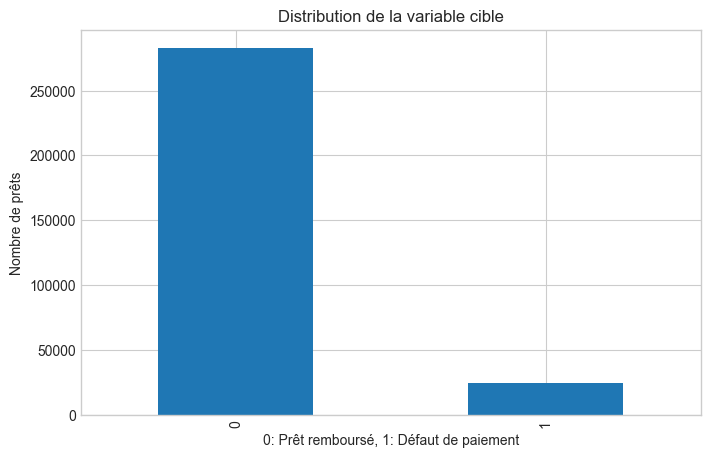

In [5]:
# Examiner la distribution de la variable cible
print("Distribution de la variable cible:")
target_counts = app_train['TARGET'].value_counts()
print(target_counts)
default_rate = target_counts[1] / len(app_train) * 100
print(f"Pourcentage de défauts de paiement: {default_rate:.2f}%")

# Tracking
mlflow.log_metric("total_samples", len(app_train))
mlflow.log_metric("class_0_count", int(target_counts[0]))
mlflow.log_metric("class_1_count", int(target_counts[1]))
mlflow.log_metric("default_rate_percent", default_rate)
mlflow.log_metric("imbalance_ratio", target_counts[0]/target_counts[1])

# Visualisation de la distribution de la cible
plt.figure(figsize=(8, 5))
app_train['TARGET'].value_counts().plot.bar()
plt.title('Distribution de la variable cible')
plt.xlabel('0: Prêt remboursé, 1: Défaut de paiement')
plt.ylabel('Nombre de prêts')
plt.show()

Distribution de la variable cible (TARGET) avec un déséquilibre des classes dans le dataset:
- Classe 0 (Prêt remboursé) : 282686 instances (91,3%)
- Classe 1 (Défaut de paiement) : 24825 instances (8,07%)

e-mail de Michaël : "Concernant l'élaboration du modèle soyez vigilant sur deux points spécifiques au contexte métier :
- Le déséquilibre entre le nombre de bons et de moins bons clients doit être pris en compte pour élaborer un modèle pertinent, avec une méthode au choix
- Le déséquilibre du coût métier entre un faux négatif (FN - mauvais client prédit bon client : donc crédit accordé et perte en capital) et un faux positif (FP - bon client prédit mauvais : donc refus crédit et manque à gagner en marge) Vous pourrez supposer, par exemple, que le coût d'un FN est dix fois supérieur au coût d'un FP"

In [6]:
# Fonction pour examiner les valeurs manquantes
def missing_values_table(df):
    # Total des valeurs manquantes
    mis_val = df.isnull().sum()
    
    # Pourcentage de valeurs manquantes
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Créer une table avec les résultats
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Renommer les colonnes
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Valeurs manquantes', 1: '% du total'})
    
    # Trier par pourcentage de valeurs manquantes décroissant
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% du total', ascending=False).round(1)
    
    # Informations récapitulatives
    print(f"Le dataframe contient {df.shape[1]} colonnes.")
    print(f"Il y a {mis_val_table_ren_columns.shape[0]} colonnes avec des valeurs manquantes.")
    
    # Retourner le dataframe avec les informations sur les valeurs manquantes
    return mis_val_table_ren_columns

In [7]:
# Statistiques sur les valeurs manquantes
missing_values = missing_values_table(app_train)

# Qualité des données
total_missing = app_train.isnull().sum().sum()
total_cells = app_train.shape[0] * app_train.shape[1]
missing_percentage = (total_missing / total_cells) * 100

mlflow.log_metric("total_missing_values", int(total_missing))
mlflow.log_metric("missing_percentage", missing_percentage)
mlflow.log_metric("columns_with_missing", int(missing_values.shape[0]))
mlflow.log_metric("complete_columns", int(app_train.shape[1] - missing_values.shape[0]))

# Examiner les types de colonnes
print("Nombre de colonnes par type de données:")
type_counts = app_train.dtypes.value_counts()
print(type_counts)

# Types de données
mlflow.log_metric("float64_columns", int(type_counts.get('float64', 0)))
mlflow.log_metric("int64_columns", int(type_counts.get('int64', 0)))
mlflow.log_metric("object_columns", int(type_counts.get('object', 0)))

print(f"Qualité des données trackée - {missing_percentage:.1f}% de valeurs manquantes")

missing_values.head(20)

Le dataframe contient 122 colonnes.
Il y a 67 colonnes avec des valeurs manquantes.
Nombre de colonnes par type de données:
float64    65
int64      41
object     16
Name: count, dtype: int64
Qualité des données trackée - 24.4% de valeurs manquantes


,Valeurs manquantes,% du total
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [8]:
# Examiner les variables catégorielles
print("\nNombre de valeurs uniques dans chaque colonne catégorielle:")
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)


Nombre de valeurs uniques dans chaque colonne catégorielle:


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- Nombre total de colonnes : 122
- Colonnes avec valeurs manquantes : 67 (55% des colonnes)
- Types de données :
    - 16 colonnes catégorielles (type 'object')
    - 106 colonnes numériques (41 de types 'int64' et 65 de type 'float64)
    - 65 colonnes de type float64 (valeurs numériques avec décimales)
- Variables catégorielle binaires (2 catégories) :
    - NAME_CONTRACT_TYPE (type de contrat)
    - FLAG_OWN_CAR (possession d'une voiture)
    - FLAG_OWN_REALTY (possession d'un bien immobilier)
    - MERGENCYSTATE_MODE (état d'urgence)
- Variables avec peu de catégories (3-8 catégories) :
    - CODE_GENDER (3 catégories, probablement M/F/Autre)
    - NAME_EDUCATION_TYPE (5 catégories)
    - NAME_FAMILY_STATUS (6 catégories)
    - NAME_HOUSING_TYPE (6 catégories)
    - NAME_TYPE_SUITE (7 catégories)
    - NAME_INCOME_TYPE (8 catégories)
- Variables avec de nombreuses catégories :
    - OCCUPATION_TYPE (18 catégories)
    - ORGANIZATION_TYPE (58 catégories)

# Traitement des variables catégorielles

In [9]:
# Label Encoding pour les variables binaires
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            le_count += 1

print(f"{le_count} colonnes ont été encodées avec LabelEncoder.")

# One-hot encoding des variables catégorielles
features_before_encoding = app_train.shape[1]
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Forme des caractéristiques après one-hot encoding:')
print(f'Entraînement: {app_train.shape}')
print(f'Test: {app_test.shape}')

# Aligner les données d'entraînement et de test
train_labels = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join='inner', axis=1)
app_train['TARGET'] = train_labels

print('Forme des caractéristiques après alignement:')
print(f'Entraînement: {app_train.shape}')
print(f'Test: {app_test.shape}')

# Tracking
mlflow.log_param("label_encoded_columns", le_count)
mlflow.log_param("one_hot_encoding_applied", True)
mlflow.log_param("features_before_encoding", features_before_encoding)
mlflow.log_metric("features_after_encoding_train", app_train.shape[1])
mlflow.log_metric("features_after_encoding_test", app_test.shape[1])
mlflow.log_metric("features_after_alignment_train", app_train.shape[1])
mlflow.log_metric("features_after_alignment_test", app_test.shape[1])

3 colonnes ont été encodées avec LabelEncoder.
Forme des caractéristiques après one-hot encoding:
Entraînement: (307511, 243)
Test: (48744, 239)
Forme des caractéristiques après alignement:
Entraînement: (307511, 240)
Test: (48744, 239)


# Analyse des anomalies

In [10]:
# Examiner DAYS_BIRTH (âge en jours négatifs)
print("Statistiques pour l'âge (DAYS_BIRTH / -365):")
print((app_train['DAYS_BIRTH'] / -365).describe())

# Examiner DAYS_EMPLOYED (jours d'emploi)
print("\nStatistiques pour les jours d'emploi (DAYS_EMPLOYED):")
print(app_train['DAYS_EMPLOYED'].describe())

Statistiques pour l'âge (DAYS_BIRTH / -365):
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Statistiques pour les jours d'emploi (DAYS_EMPLOYED):
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


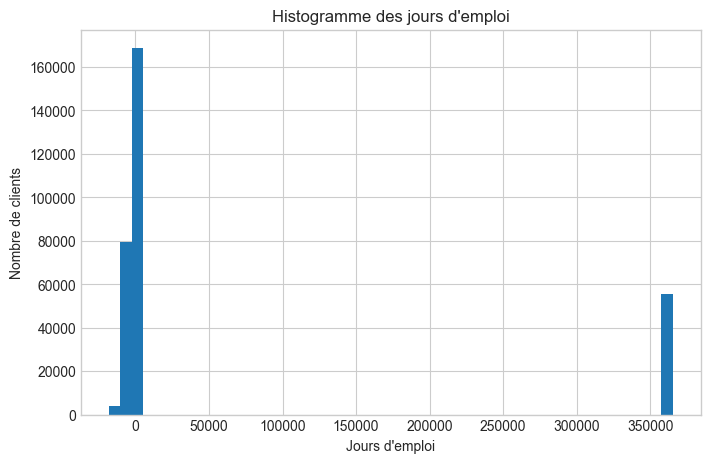

In [11]:
# Visualiser la distribution des jours d'emploi
app_train['DAYS_EMPLOYED'].hist(bins=50)
plt.title('Histogramme des jours d\'emploi')
plt.xlabel('Jours d\'emploi')
plt.ylabel('Nombre de clients')
plt.show()

In [12]:
# Identifier les anomalies dans DAYS_EMPLOYED
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print(f'Les clients sans anomalies font défaut sur {100 * non_anom["TARGET"].mean():.2f}% des prêts')
print(f'Les clients avec anomalies font défaut sur {100 * anom["TARGET"].mean():.2f}% des prêts')
print(f'Il y a {len(anom)} jours d\'emploi anomaux')

# Anomalies
anomaly_count = len(anom)
anomaly_percentage = (anomaly_count / len(app_train)) * 100

mlflow.log_param("anomaly_value_detected", 365243)
mlflow.log_param("anomaly_treatment", "replace_with_nan_and_flag")
mlflow.log_metric("anomaly_count", anomaly_count)
mlflow.log_metric("anomaly_percentage", anomaly_percentage)
mlflow.log_metric("anomaly_default_rate", anom["TARGET"].mean() * 100)
mlflow.log_metric("normal_default_rate", non_anom["TARGET"].mean() * 100)

# Impact de l'anomalie
impact = abs(anom["TARGET"].mean() - non_anom["TARGET"].mean()) * 100
mlflow.log_metric("anomaly_impact_on_default", impact)

# Créer une caractéristique d'indicateur d'anomalie
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243

# Remplacer les valeurs anomales par NaN
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print(f"Anomalies trackées - {anomaly_count:,} cas détectés ({anomaly_percentage:.1f}%)")

Les clients sans anomalies font défaut sur 8.66% des prêts
Les clients avec anomalies font défaut sur 5.40% des prêts
Il y a 55374 jours d'emploi anomaux
Anomalies trackées - 55,374 cas détectés (18.0%)


Statistiques des jours d'emploi
- Valeur maximale : 365243 jours (l'anomalie identifiée)
- Valeurs négatives : La plupart des valeurs sont négatives (comme pour DAYS_BIRTH)
- Ecart très important entre moyenne (63815) et médiane (-1213) : forte asymétrie due à l'anomalie


Statistiques de l'âge
- Âge moyen : environ 44 ans
- Âge minimal : 20.5 ans
- Âge maximal : 69.1 ans
- Ecart entre moyenne et médiane faible : distribution relativement normale


Taux de défaut
- Clients sans anomalies : 8.66% de défaut
- Clients avec anomalies : 5.40% de défaut

"La gestion des anomalies dépend de la situation exacte, sans règles établies. L'une des approches les plus sûres consiste simplement à remplacer les anomalies par une valeur manquante puis à les combler (par imputation) avant l'apprentissage automatique. Dans  ce cas, puisque toutes les anomalies ont exactement la même valeur, nous voulons les  remplacer par la même valeur au cas où tous ces prêts auraient quelque chose en commun. Les valeurs anomales semblent avoir une certaine importance, nous voulons  donc indiquer au modèle d'apprentissage automatique si nous avons effectivement
 remplacé ces valeurs. Comme solution, nous remplacerons les valeurs anomales par 'not a number' (np.nan) puis créerons une nouvelle colonne booléenne indiquant si la valeur était anomale ou non." Will Koehrsen

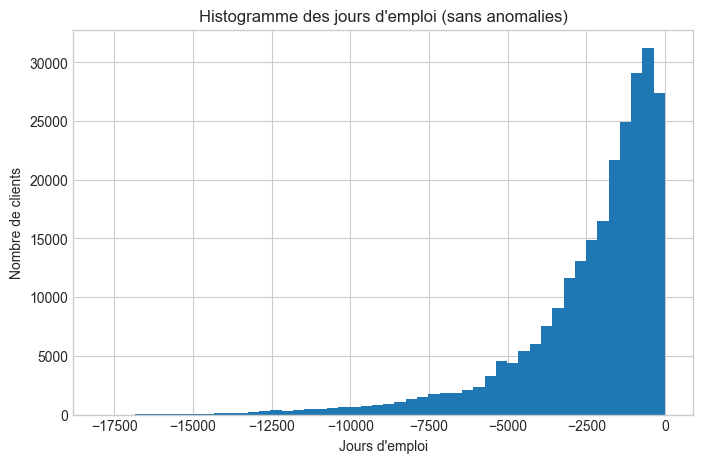

In [13]:
# Visualiser la distribution après correction
app_train['DAYS_EMPLOYED'].hist(bins=50)
plt.title('Histogramme des jours d\'emploi (sans anomalies)')
plt.xlabel('Jours d\'emploi')
plt.ylabel('Nombre de clients')
plt.show()

- Toutes les valeurs sont négatives car elles représentent le nombre de jours avant la demande de prêt actuelle.
- La plupart des clients ont des emplois relativement récents (<2500 derniers jours  soit env. 7 ans).
- Pic près de 0 pourrait indiquer des clients qui viennent de commencer un nouvel  emploi.
- Distribution asymétrique

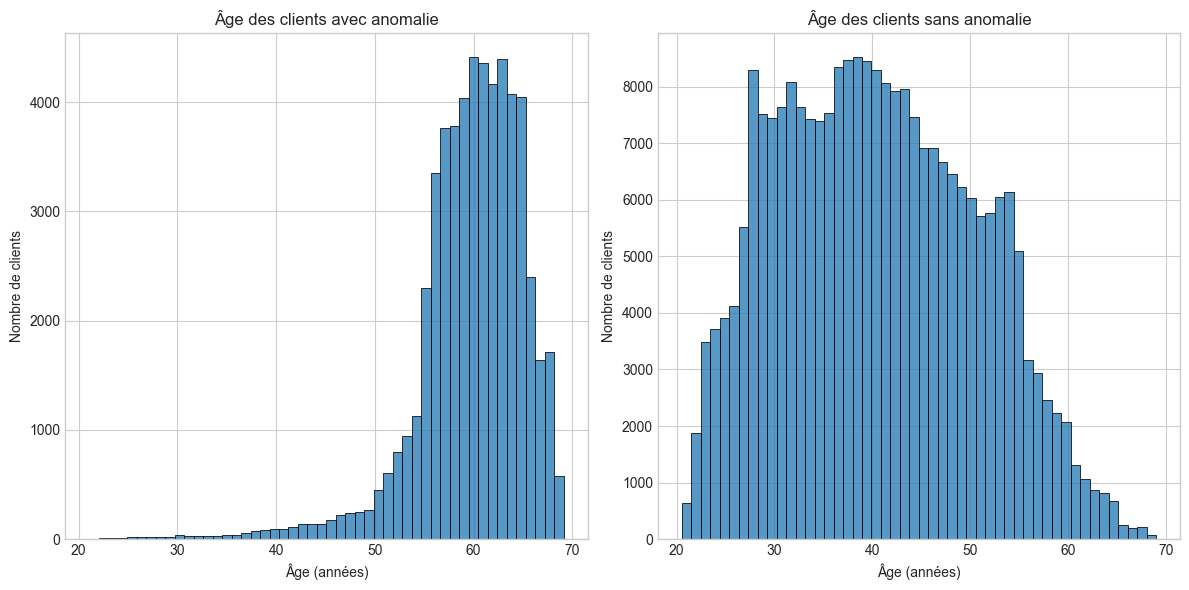

In [14]:
# Créer une visualisation de l'âge des clients avec et sans anomalie
plt.figure(figsize=(12, 6))

# Distribution de l'âge pour les clients avec anomalie
plt.subplot(1, 2, 1)
sns.histplot(anom['DAYS_BIRTH'] / -365, bins=50)
plt.title('Âge des clients avec anomalie')
plt.xlabel('Âge (années)')
plt.ylabel('Nombre de clients')

# Distribution de l'âge pour les clients sans anomalie
plt.subplot(1, 2, 2)
sns.histplot(non_anom['DAYS_BIRTH'] / -365, bins=50)
plt.title('Âge des clients sans anomalie')
plt.xlabel('Âge (années)')
plt.ylabel('Nombre de clients')

plt.tight_layout()
plt.show()

In [15]:
# Créer les sous-ensembles avec et sans anomalie
anom = app_train[app_train['DAYS_EMPLOYED_ANOM'] == True]
non_anom = app_train[app_train['DAYS_EMPLOYED_ANOM'] == False]

# Rechercher les colonnes one-hot pour le type de revenu
income_type_cols = [col for col in app_train.columns if 'NAME_INCOME_TYPE_' in col]

# Afficher la distribution par type de client
print("Distribution des types de revenus par groupe de clients:")
if len(anom) > 0:
    for col in income_type_cols:
        income_type = col.replace('NAME_INCOME_TYPE_', '')
        anom_pct = anom[col].mean() * 100
        non_anom_pct = non_anom[col].mean() * 100
        print(f"{income_type:<20} - Avec anomalie: {anom_pct:>6.2f}% | Sans anomalie: {non_anom_pct:>6.2f}%")
else:
    for col in income_type_cols:
        income_type = col.replace('NAME_INCOME_TYPE_', '')
        total_pct = app_train[col].mean() * 100
        print(f"{income_type:<20} - Total: {total_pct:>6.2f}%")

Distribution des types de revenus par groupe de clients:
Businessman          - Avec anomalie:   0.00% | Sans anomalie:   0.00%
Commercial associate - Avec anomalie:   0.00% | Sans anomalie:  28.40%
Pensioner            - Avec anomalie:  99.96% | Sans anomalie:   0.00%
State servant        - Avec anomalie:   0.00% | Sans anomalie:   8.61%
Student              - Avec anomalie:   0.00% | Sans anomalie:   0.01%
Unemployed           - Avec anomalie:   0.04% | Sans anomalie:   0.00%
Working              - Avec anomalie:   0.00% | Sans anomalie:  62.97%


Les clients avec anomalie sont les clients retraités

In [16]:
# Identifier les clients sans revenus
no_income_mask = (app_train['AMT_INCOME_TOTAL'] == 0) | (app_train['AMT_INCOME_TOTAL'].isnull())
clients_no_income = app_train[no_income_mask]
clients_with_income = app_train[~no_income_mask]

# Statistiques
total_clients = len(app_train)
no_income_count = len(clients_no_income)
no_income_pct = (no_income_count / total_clients) * 100

print(f" Analyse des revenus:")
print(f" Total clients: {total_clients:,}")
print(f" Clients sans revenus: {no_income_count:,} ({no_income_pct:.2f}%)")

if no_income_count > 0:
    # Analyse des prêts accordés
    no_income_target = clients_no_income['TARGET']
    default_rate_no_income = no_income_target.mean() * 100
    
    print(f" Taux de défaut (sans revenus): {default_rate_no_income:.2f}%")
    print(f" Taux de défaut (avec revenus): {clients_with_income['TARGET'].mean() * 100:.2f}%")
    
    # Montants des prêts
    credit_amounts_no_income = clients_no_income['AMT_CREDIT'].describe()
    print(f"\n Montants de crédit (clients sans revenus):")
    print(credit_amounts_no_income)
    
    # Types de revenus des clients "sans revenus"
    print(f"\nTypes de revenus déclarés (clients 'sans revenus'):")
    income_types = clients_no_income['NAME_INCOME_TYPE'].value_counts()
    print(income_types)
    
    # Tracking MLflow
    mlflow.log_metric("clients_no_income_count", no_income_count)
    mlflow.log_metric("clients_no_income_pct", no_income_pct)
    mlflow.log_metric("default_rate_no_income", default_rate_no_income)
    mlflow.log_metric("default_rate_with_income", clients_with_income['TARGET'].mean() * 100)
else:
    print(" Tous les clients ont des revenus déclarés")
    mlflow.log_param("all_clients_have_income", True)

 Analyse des revenus:
 Total clients: 307,511
 Clients sans revenus: 0 (0.00%)
 Tous les clients ont des revenus déclarés


In [17]:
# Isoler uniquement les variables numériques pour la corrélation
numeric_columns = app_train.select_dtypes(include=['int64', 'float64']).columns

# Calculer les corrélations avec la cible (uniquement pour les variables numériques)
correlations = app_train[numeric_columns].corr()['TARGET'].sort_values()

# Afficher les corrélations les plus importantes
print('Corrélations les plus positives:')
print(correlations.tail(15))

print('\nCorrélations les plus négatives:')
print(correlations.head(15))

Corrélations les plus positives:
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Corrélations les plus négatives:
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0

 Facteurs augmentant la probabilité de défaut
- Une période d'emploi plus longue* (DAYS_EMPLOYED 0.075) *valeurs négatives, une corrélation positive signifie en réalité que moins de jours d'emploi (emploi plus récent) augmente le risque
- Vivre dans une région mal notée (REGION_RATING_CLIENT_W_CITY 0.061, REGION_RATING_CLIENT 0.059)
- Avoir un document d'identité émis il y a plus longtemps* (DAYS_ID_PUBLISH 0.051) *valeurs négatives
- Avoir été enregistré il y a plus longtemps* (DAYS_REGISTRATION 0.042) - *valeurs négatives
- Avoir changé de téléphone il y a plus longtemps* (DAYS_LAST_PHONE_CHANGE 0.055) - *valeurs négatives
- Travailler dans une ville différente de celle où l'on est enregistré  (REG_CITY_NOT_WORK_CITY 0.051)
- Avoir un téléphone professionnel (FLAG_EMP_PHONE 0.046)
- Être enregistré dans une ville différente de celle où l'on vit (REG_CITY_NOT_LIVE_CITY 0.044)
- Posséder certains documents spécifiques (FLAG_DOCUMENT_3 0.044)
- Posséder une voiture plus ancienne (OWN_CAR_AGE 0.038)


Facteurs réduisant la probabilité de défaut
- Scores externes élevés (EXT_SOURCE_3 -0.179, EXT_SOURCE_2 -0.160, EXT_SOURCE_1 -0.155)
- Être plus jeune* (DAYS_BIRTH -0.078) - *valeurs négatives, donc une corrélation négative signifie en réalité que plus d'âge (client plus âgé) réduit le risque
- Vivre dans un immeuble avec plus d'étages (FLOORSMAX_AVG -0.044, FLOORSMAX_MEDI -0.044, FLOORSMAX_MODE -0.043)
- Prix des biens achetés plus élevé (AMT_GOODS_PRICE -0.040)
- Vivre dans une région plus peuplée (REGION_POPULATION_RELATIVE -0.037)
- Habiter dans un immeuble avec ascenseurs (ELEVATORS_AVG -0.034, ELEVATORS_MEDI -0.034)
- Disposer d'une superficie habitable plus grande (LIVINGAREA_AVG -0.033, LIVINGAREA_MEDI -0.033)


 !!! Note importante sur l'interprétation des variables temporelles
 - Dans ce dataset, les variables temporelles comme DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH et DAYS_LAST_PHONE_CHANGE sont exprimées en jours négatifs par rapport à la date de la demande de prêt. Plus la valeur est négative (plus le nombre est grand en valeur absolue), plus l'événement est ancien. Ainsi, l'interprétation des corrélations pour ces variables doit être inversée:
- Une corrélation positive avec des jours négatifs signifie que plus l'événement est récent, plus le risque augmente
- Une corrélation négative avec des jours négatifs signifie que plus l'événement est ancien, plus le risque augmente
- C'est pourquoi, bien que DAYS_BIRTH ait une corrélation négative (-0.078), cela indique en réalité que les clients plus âgés ont un risque de défaut plus faible

In [18]:
# Analyser la relation entre l'âge et le remboursement
# Convertir en valeur absolue pour faciliter l'interprétation
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
age_target_corr = app_train['DAYS_BIRTH'].corr(app_train['TARGET'])
print(f"Corrélation entre l'âge et la cible: {age_target_corr}")

# Statistiques
age_years = app_train['DAYS_BIRTH'] / 365
mlflow.log_metric("age_mean", float(age_years.mean()))
mlflow.log_metric("age_median", float(age_years.median()))
mlflow.log_metric("age_min", float(age_years.min()))
mlflow.log_metric("age_max", float(age_years.max()))
mlflow.log_metric("age_target_correlation", float(age_target_corr))

Corrélation entre l'âge et la cible: -0.07823930830982691


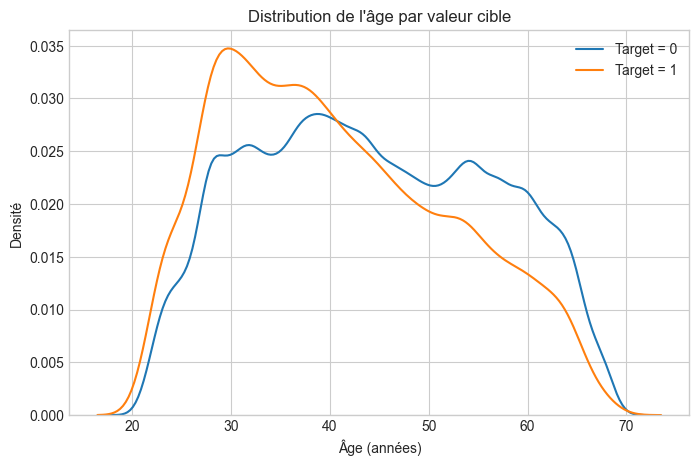

In [19]:
# KDE plot de l'âge par valeur cible
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='Target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='Target = 1')
plt.xlabel('Âge (années)')
plt.ylabel('Densité')
plt.title('Distribution de l\'âge par valeur cible')
plt.legend()
plt.show()

- Courbe bleue: clients qui ont remboursé leur prêt (TARGET = 0) 
- Courbe rouge: clients en défaut de paiement (TARGET = 1)

L'analyse des distributions par valeur cible révèle que les clients en défaut sont concentrés dans les tranches d'âge plus jeunes (pic autour de 29 ans). Les clients qui
 remboursent ont une distribution plus étalée et plus âgée

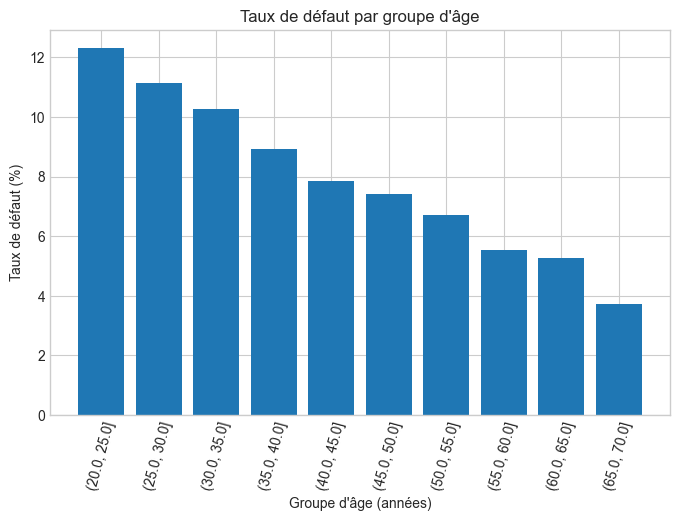

In [20]:
# Analyser l'âge par tranches
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Diviser l'âge en tranches
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, 11))
age_groups = age_data.groupby('YEARS_BINNED').mean()

# Visualiser le taux de défaut par tranche d'âge
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation=75)
plt.xlabel('Groupe d\'âge (années)')
plt.ylabel('Taux de défaut (%)')
plt.title('Taux de défaut par groupe d\'âge')
plt.show()

Taux de défaut par groupe d'âge montre que le taux de défaut diminue régulièrement avec l'âge, passant de plus de 12% pour les 20-25 ans à moins de 4% pour les 65-70 ans.  La baisse la plus marquée se situe entre les adultes de 20 à 35 ans et les adultes de 35 à 50 ans Chez les seniors, les taux de défaut sont les plus bas.

Implications pour le modèle de scoring La relationj est claire entre l'âge et le taux de défaut, l'age devra etre integré dans le modele de scoring

# Analyse des sources externes
 Dans la documentation, les varaibles EXT_SOURCE_ sotn définies comme "Score normalisé provenant d'une source de données externe, normalisé" Le terme "normalisé" dans ce contexte signifie probablement que les scores ont été ajustés pour suivre une distribution standard (comme une distribution normale avec moyenne 0 et écart-type 1, ou une échelle de 0 à 1) afin de faciliter les comparaisons et l'utilisation dans des modèles statistiques

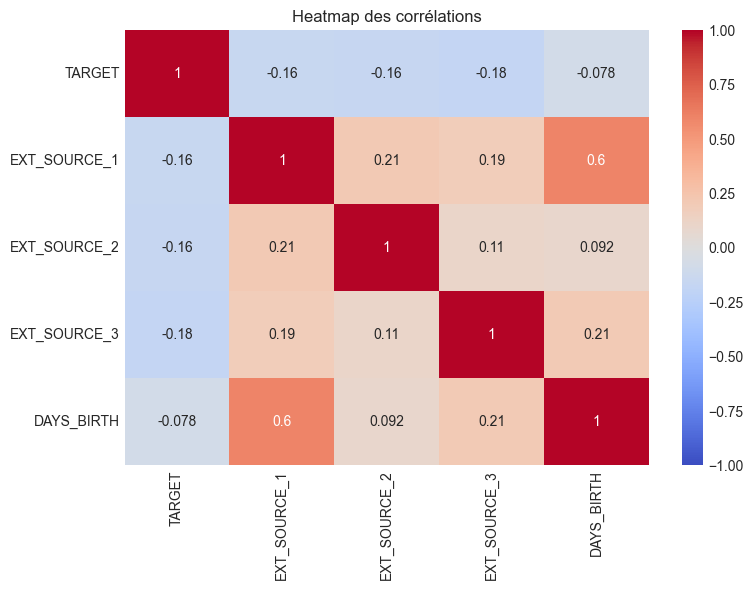

In [21]:
# Extraire les variables EXT_SOURCE et visualiser leurs corrélations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

# Log des statistiques dans MLflow
for i in [1, 2, 3]:
    col = f'EXT_SOURCE_{i}'
    if col in app_train.columns:
        correlation = app_train[col].corr(app_train['TARGET'])
        missing_pct = app_train[col].isnull().mean() * 100
        mean_value = app_train[col].mean()
        mlflow.log_metric(f"ext_source_{i}_correlation", float(correlation))
        mlflow.log_metric(f"ext_source_{i}_missing_pct", missing_pct)
        mlflow.log_metric(f"ext_source_{i}_mean", float(mean_value))

# Visualiser leurs corrélations
plt.figure(figsize=(8, 6))
sns.heatmap(ext_data_corrs, cmap=plt.cm.coolwarm, vmin=-1, annot=True, vmax=1)
plt.title('Heatmap des corrélations')
plt.tight_layout()
plt.show()

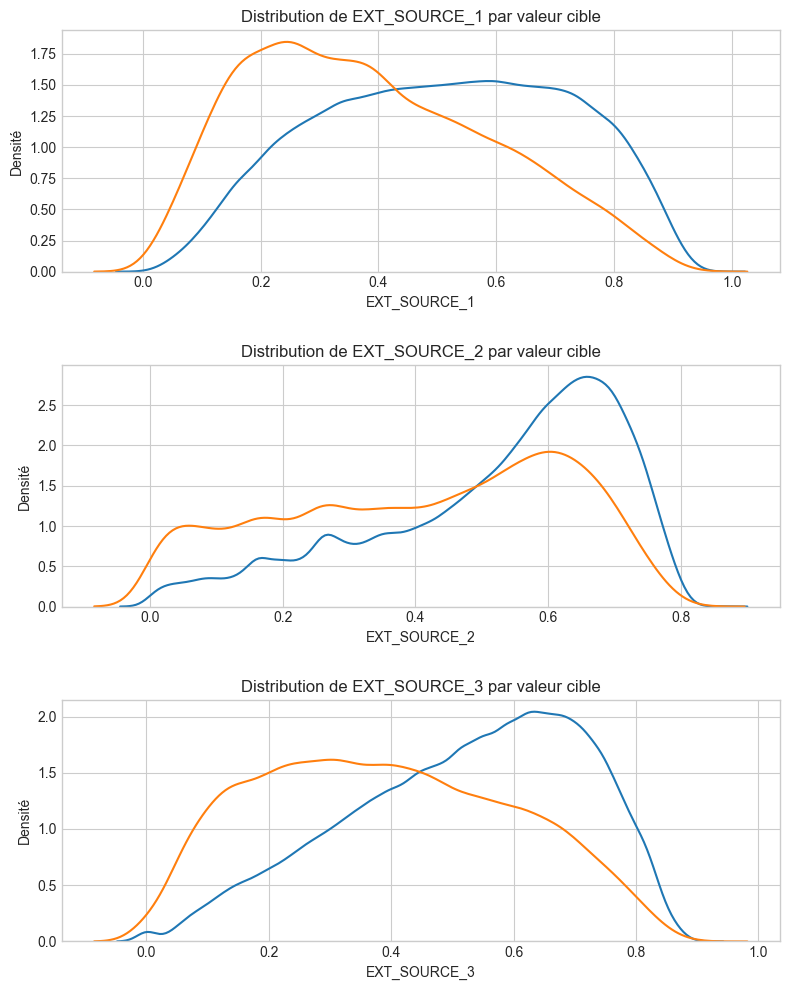

In [22]:
# Visualiser la distribution des sources externes par valeur cible
plt.figure(figsize=(8, 10))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='Target = 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='Target = 1')
    plt.title(f'Distribution de {source} par valeur cible')
    plt.xlabel(source)
    plt.ylabel('Densité')
    
plt.tight_layout(h_pad=2.5)
plt.show()

Corrélations avec la cible (TARGET):
- Les 3 scores externes ont des corrélations négatives avec la cible: EXT_SOURCE_3:-0.18 / EXT_SOURCE_2: -0.16 / EXT_SOURCE_1: -0.16
- L'âge (DAYS_BIRTH): -0.078 (Attention: comme DAYS_BIRTH est exprimé en jours négatifs, cette corrélation négative indique que les clients plus âgés ont un risque de
 défaut plus faible)


Corrélations entre EXT_SOURCE_1 et l'âge:
- EXT_SOURCE_1 et DAYS_BIRTH ont une forte corrélation positive (0.6)
- Comme DAYS_BIRTH est négatif, cela signifie que EXT_SOURCE_1 augmente avec l'âge (valeurs plus négatives = personnes plus âgées) Donc EXT_SOURCE_1 semble
 être un score qui favorise les clients plus âgés


Corrélations entre les sources externes:
- EXT_SOURCE_1 et EXT_SOURCE_2: 0.21
- EXT_SOURCE_1 et EXT_SOURCE_3: 0.19
- EXT_SOURCE_2 et EXT_SOURCE_3: 0.11<br>
Ces corrélations positives mais modérées indiquent que les 3 scores externes capturent des informations à priori différentes.

In [23]:
if mlflow.active_run():
    run = mlflow.active_run()
    print(f" Fermeture du run MLflow: {run.info.run_name} ")
    mlflow.end_run()

print(" Résultat dans MLflow UI http://localhost:5000")

 Fermeture du run MLflow: data_exploration_analysis 
🏃 View run data_exploration_analysis at: http://localhost:5000/#/experiments/250909365473291520/runs/01a3e596b44840c580904bb8d33e61ec
🧪 View experiment at: http://localhost:5000/#/experiments/250909365473291520
 Résultat dans MLflow UI http://localhost:5000
